In [75]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from glob import glob
from matplotlib.pyplot import figure
from matplotlib.dates import HourLocator
from matplotlib.dates import DateFormatter

%matplotlib inline

In [76]:
files = glob('./*wk*.csv')

In [77]:
dfs = {}
for f in files:
    d = pd.read_csv(f)
    d['TIME'] = pd.to_datetime(d['TIME'].apply(lambda x: x.split(":")[0]), format="%H")
    dfs[f] = d


In [78]:
df = dfs['./CANAL_ST_wkdy.csv']
dfw = dfs['./CANAL_ST_wknd.csv']

df1 = pd.DataFrame(df[df['CA'] == 'A043'])
df1 = df1.groupby(by=["STATION", "TIME"])['TOTAL_DELTA'].mean().to_frame(name = 'TOTAL_DELTA_PER_HOUR').reset_index()

df2 = pd.DataFrame(df[df['CA'] == 'A046'])
df2 = df2.groupby(by=["STATION", "TIME"])['TOTAL_DELTA'].mean().to_frame(name = 'TOTAL_DELTA_PER_HOUR').reset_index()

df3 = pd.DataFrame(dfw[dfw['CA'] == 'A043'])
df3 = df3.groupby(by=["STATION", "TIME"])['TOTAL_DELTA'].mean().to_frame(name = 'TOTAL_DELTA_PER_HOUR').reset_index()

df4 = pd.DataFrame(dfw[dfw['CA'] == 'A046'])
df4 = df4.groupby(by=["STATION", "TIME"])['TOTAL_DELTA'].mean().to_frame(name = 'TOTAL_DELTA_PER_HOUR').reset_index()


<Figure size 432x288 with 0 Axes>

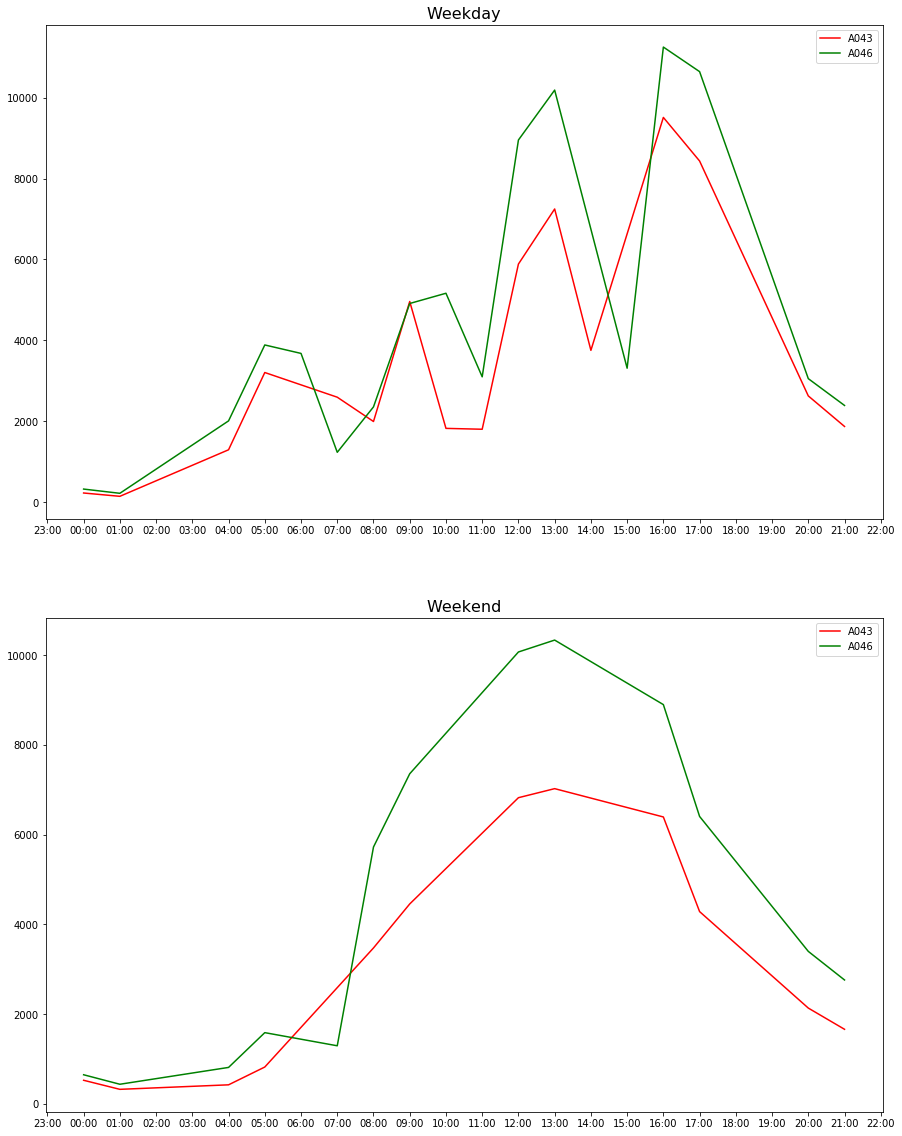

In [79]:
plt.suptitle('Canal St Traffic',fontsize = 16) #suptitle is title of whole charts

plt.figure(figsize = [15, 20])

ax = plt.subplot(2, 1, 1)
plt.title('Weekday',fontsize = 16)
ax.plot(df1['TIME'], df1.TOTAL_DELTA_PER_HOUR,'r')
ax.plot(df2['TIME'], df2.TOTAL_DELTA_PER_HOUR,'g')
ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.legend(['A043','A046'])

ax = plt.subplot(2, 1, 2)
plt.title('Weekend',fontsize = 16)
ax.plot(df3['TIME'], df3.TOTAL_DELTA_PER_HOUR,'r')
ax.plot(df4['TIME'], df4.TOTAL_DELTA_PER_HOUR,'g')
ax.xaxis.set_major_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.legend(['A043','A046'])

In [ ]:
#